Objetivo del modelo K-Means

Segmentar a los clientes en grupos homogéneos basados en características de comportamiento como duración del contrato (tenure), facturación mensual (MonthlyCharges), y consumo acumulado (TotalCharges), con el fin de identificar patrones de uso, fidelidad y riesgo de cancelación.

k = 2 | Silhouette Score = 0.148
k = 3 | Silhouette Score = 0.134
k = 4 | Silhouette Score = 0.144
k = 5 | Silhouette Score = 0.144
k = 6 | Silhouette Score = 0.133
k = 7 | Silhouette Score = 0.107
k = 8 | Silhouette Score = 0.098
k = 9 | Silhouette Score = 0.100
k = 10 | Silhouette Score = 0.105

✅ Mejor número de clústeres: k = 2 (Silhouette Score = 0.148)


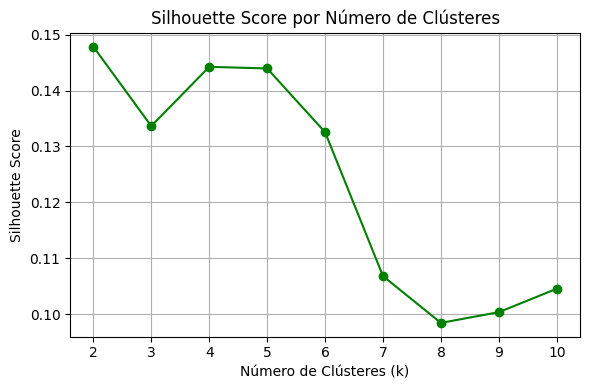

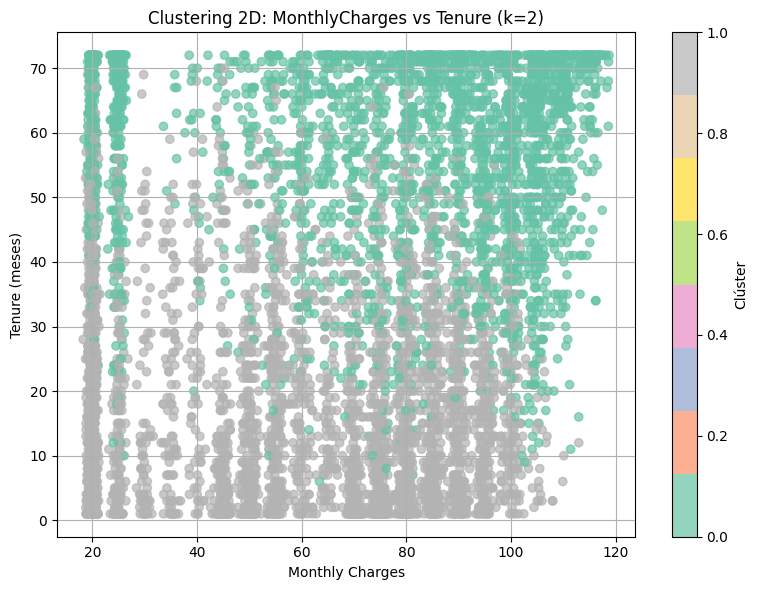

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

sil_scores = []
inertia_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    inertia = kmeans.inertia_
    sil_scores.append(sil)
    inertia_scores.append(inertia)
    print(f"k = {k} | Silhouette Score = {sil:.3f}")

best_k = range_k[np.argmax(sil_scores)]
print(f"\n✅ Mejor número de clústeres: k = {best_k} (Silhouette Score = {max(sil_scores):.3f})")

plt.figure(figsize=(6, 4))
plt.plot(range_k, sil_scores, marker='o', color='green')
plt.title("Silhouette Score por Número de Clústeres")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df["MonthlyCharges"], df["tenure"], c=clusters, cmap='Set2', alpha=0.7)
plt.title(f"Clustering 2D: MonthlyCharges vs Tenure (k={best_k})")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure (meses)")
plt.grid(True)
plt.colorbar(label="Clúster")
plt.tight_layout()
plt.show()


## Conclusión general

**K-Means no está logrando segmentar bien los clientes con las variables actuales.**  
Es posible que:

- Las variables utilizadas (`tenure` y `MonthlyCharges`) **no tengan una estructura de clúster clara**.
- El dataset esté más distribuido como un **continuo** que como **grupos discretos**.
- Sea necesario usar otras técnicas más apropiadas como:
  - Clustering jerárquico
  - **GMM (Gaussian Mixture Models)**
  - **PCA + clustering**

---

## En resumen

Los **Silhouette Scores** obtenidos son bajos porque **los clientes no se agrupan naturalmente en clústeres bien separados**.


k = 2 | Silhouette Score = 0.485
k = 3 | Silhouette Score = 0.548
k = 4 | Silhouette Score = 0.459
k = 5 | Silhouette Score = 0.489
k = 6 | Silhouette Score = 0.477
k = 7 | Silhouette Score = 0.470
k = 8 | Silhouette Score = 0.473
k = 9 | Silhouette Score = 0.469
k = 10 | Silhouette Score = 0.459

✅ Mejor número de clústeres: k = 3 (Silhouette Score = 0.548)


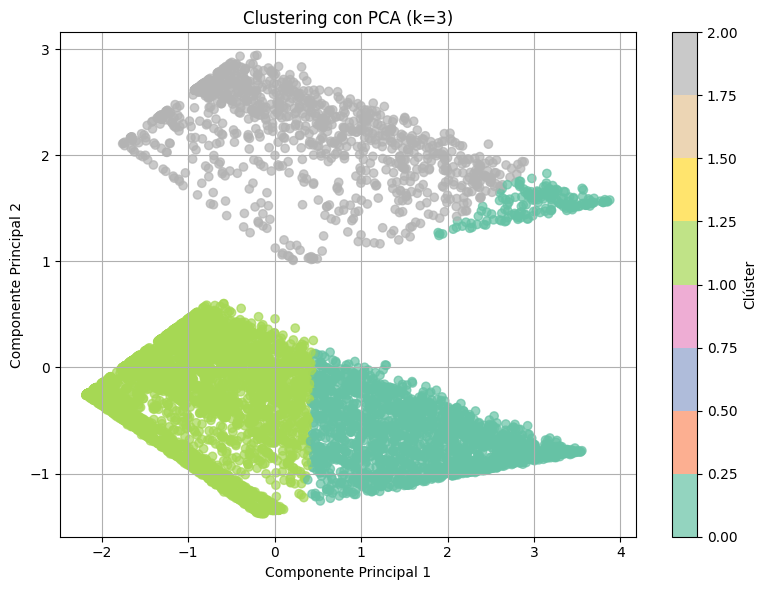

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Seleccionar variables relevantes numéricas
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensionalidad de los datos numericos
# Capturan la mayor varianza posible de los datos.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

range_k = range(2, 11)
sil_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)
    print(f"k = {k} | Silhouette Score = {sil:.3f}")

best_k = range_k[np.argmax(sil_scores)]
print(f"\n✅ Mejor número de clústeres: k = {best_k} (Silhouette Score = {max(sil_scores):.3f})")

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters,
    cmap='Set2',
    alpha=0.7
)
plt.title(f"Clustering con PCA (k={best_k})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clúster")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusión

El modelo de clustering sugiere que los clientes pueden dividirse en **3 grupos distintos** con características similares, basadas en su **cuota mensual**, **antigüedad**, **gastos totales** y **condición de senior**.

Aunque los clústeres no están extremadamente separados, el resultado es **suficientemente bueno para segmentar clientes de forma útil**, por ejemplo, para aplicar **estrategias comerciales o de retención personalizada**.
